In [256]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from src.utils import set_seed

In [257]:
set_seed(42)

Random seed 42 has been set.


In [258]:
x_1 = np.random.normal(0, 1, 25000)

In [259]:
u_1 = np.random.uniform(-1, 1, 25000)

In [260]:
r_x = np.exp(x_1)/(1+np.exp(x_1))

In [261]:
alpha = 1
Y = np.where(x_1 + alpha * u_1 > 0, 1, 0)


In [262]:
human_predictions = [0] * len(Y)
for i in range(len(Y)):
        coin = np.random.binomial(1, np.min([3*r_x[i], .90]), 1)[0]
        if coin == 1:
            human_predictions[i] = Y[i]
        else:
            human_predictions[i] = 1 - Y[i]
H = np.array(human_predictions)

In [263]:
binned = np.digitize(r_x, np.linspace(0, 1, 40))

In [264]:
import pandas as pd
df = pd.DataFrame({'r_x': r_x, 'H': H, 'Y': Y, 'binned': binned, 'correct_hum': H==Y,})

In [265]:
df_1 = df.groupby('binned').mean().reset_index()

In [266]:
df_1

,binned,r_x,H,Y,correct_hum
0,1,0.022167,1.000000,0.000000,0.000000
1,2,0.042726,0.869565,0.000000,0.130435
2,3,0.065474,0.787402,0.000000,0.212598
3,4,0.091317,0.740000,0.000000,0.260000
4,5,0.116084,0.640264,0.000000,0.359736
5,6,0.141331,0.564039,0.000000,0.435961
6,7,0.167733,0.502137,0.000000,0.497863
7,8,0.192296,0.416529,0.000000,0.583471
8,9,0.217543,0.334884,0.000000,0.665116
9,10,0.243811,0.270092,0.000000,0.729908


In [267]:
from sklearn.metrics import accuracy_score

accuracy_score(Y[x_1<.5], H[x_1<.5])

0.8246283764243161

In [268]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

X = x_1
Y = Y
X_train, X_test, Y_train, Y_test, H_train, H_test = train_test_split(X, Y, H, stratify=Y, test_size=0.2, random_state=42)
X_train, X_cal, Y_train, Y_cal, H_train, H_cal = train_test_split(X_train, Y_train, H_train, stratify=Y_train, test_size=0.125, random_state=42)
X_train = torch.tensor(X_train).float().view(-1, 1)
Y_train = torch.tensor(Y_train).long()
X_test = torch.tensor(X_test).float().view(-1, 1)
Y_test = torch.tensor(Y_test).long()
X_cal = torch.tensor(X_cal).float().view(-1, 1)
Y_cal = torch.tensor(Y_cal).long()
H_train = torch.tensor(H_train).long()
H_test = torch.tensor(H_test).long()
H_cal = torch.tensor(H_cal).long()
train_dataset = TensorDataset(X_train, Y_train, H_train)
cal_dataset = TensorDataset(X_cal, Y_cal, H_cal)
test_dataset = TensorDataset(X_test, Y_test, H_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
cal_loader = DataLoader(cal_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [271]:
H_train.shape

torch.Size([17500])

  7%|▋         | 2/30 [00:01<00:19,  1.45it/s]C:\Users\andre\anaconda3\envs\EmpiricalBenchmarks4SC\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
C:\Users\andre\anaconda3\envs\EmpiricalBenchmarks4SC\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
 13%|█▎        | 4/30 [00:03<00:22,  1.14it/s]C:\Users\andre\anaconda3\envs\EmpiricalBenchmarks4SC\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
C:\Users\andre\anaconda3\envs\EmpiricalBenchmarks4SC\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
 20%|██        | 6/30 [00:05<00:21,  1.14it/s]C:\Users\andre\anaconda3\envs\EmpiricalBenchmarks4SC\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
C:\Users\andre\anaconda3\envs\EmpiricalBenchmarks4SC\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid val

In [274]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
for i, (x, y, h) in enumerate(train_loader):
    print(x, y, h)
    break

tensor([[-1.1414],
        [-0.4284],
        [ 0.2529],
        [ 1.7553],
        [-1.8255],
        [ 0.6970],
        [ 1.2917],
        [-0.1047],
        [-0.3920],
        [ 0.2233],
        [ 0.5130],
        [ 0.4255],
        [ 1.3176],
        [ 0.3320],
        [ 2.8242],
        [ 0.7876],
        [ 1.2711],
        [ 0.7219],
        [-1.6124],
        [-0.3329],
        [-0.9742],
        [ 0.7075],
        [-1.8038],
        [ 0.5818],
        [-0.5094],
        [ 1.7459],
        [-0.7113],
        [ 0.1670],
        [-1.2331],
        [ 0.1335],
        [ 0.9686],
        [-0.8857],
        [-2.2012],
        [-0.3747],
        [ 1.1141],
        [ 1.4528],
        [ 0.9510],
        [ 1.7634],
        [ 0.5747],
        [ 0.2455],
        [ 1.0869],
        [ 1.8054],
        [ 0.6325],
        [ 1.3745],
        [ 0.4033],
        [ 0.1681],
        [-1.2396],
        [ 0.9386],
        [ 0.5672],
        [-0.4463],
        [-0.6542],
        [ 1.4745],
        [ 0.

In [275]:
deferring_system_preds = model.test(test_loader)

(array([ 770.,  441.,  343.,  340.,  319.,  317.,  370.,  424.,  575.,
        1101.]),
 array([-0.99984164, -0.82896832, -0.65809501, -0.4872217 , -0.31634838,
        -0.14547507,  0.02539824,  0.19627156,  0.36714487,  0.53801818,
         0.7088915 ]),
 <BarContainer object of 10 artists>)

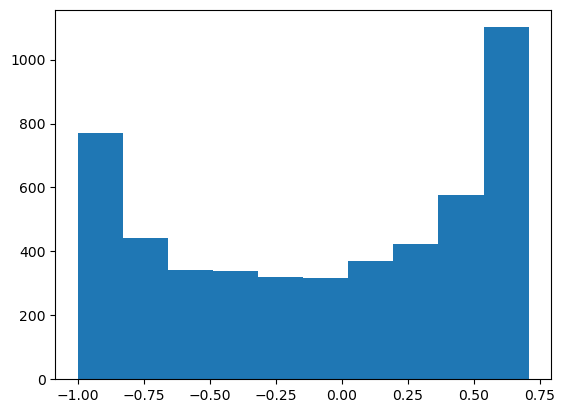

In [276]:
rej_scores = deferring_system_preds["rej_score"]
deferring_system_preds['defers'].mean()
plt.hist(rej_scores)

In [277]:
preds = deferring_system_preds["preds"]

In [279]:
np.mean(test_vals["hum_preds"] == Y_test.numpy())

0.8536

In [280]:
np.mean(test_vals["preds"] == Y_test.numpy())

0.8124

In [281]:
np.mean(correct)

0.9348

In [282]:
threshold

0.0031310468912124634

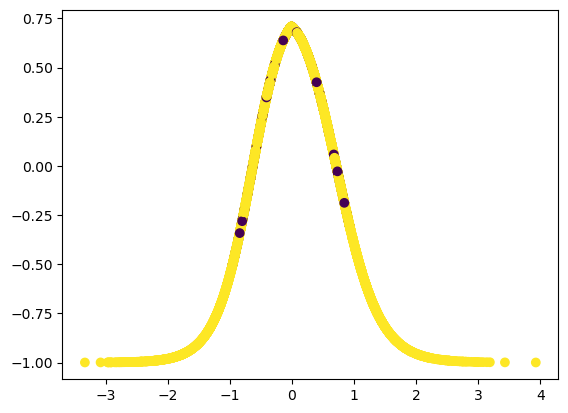

In [283]:
plt.scatter(X_test, rej_scores, c=correct)


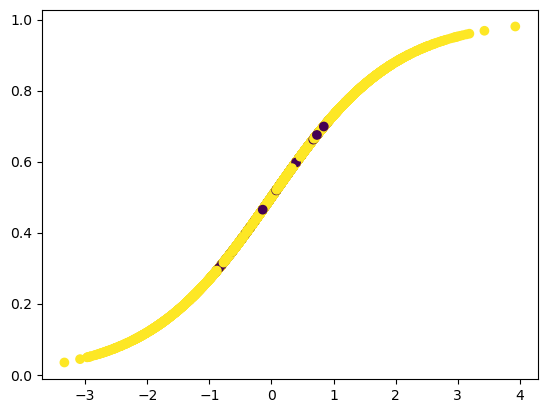

In [284]:
plt.scatter(X_test, np.exp(X_test.numpy())/(1+np.exp(X_test.numpy())), c=correct)

In [285]:
scores = model.test(test_loader)["preds"]
corrected_ML = np.array(scores == Y_test.numpy()).astype(int)
scores = model.test(test_loader)["hum_preds"]
corrected_hum = np.array(scores == Y_test.numpy()).astype(int)


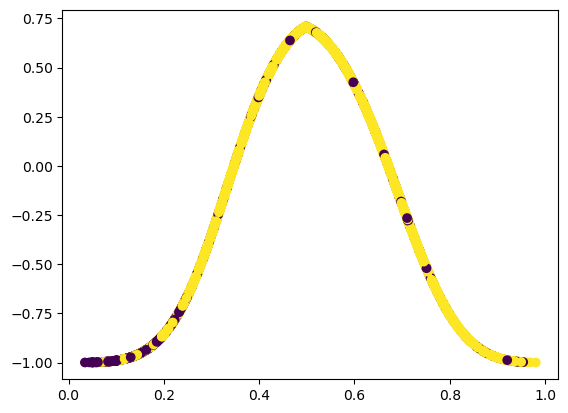

In [286]:
plt.scatter(np.exp(X_test.numpy())/(1+np.exp(X_test.numpy())), rej_scores,  c=corrected_hum)

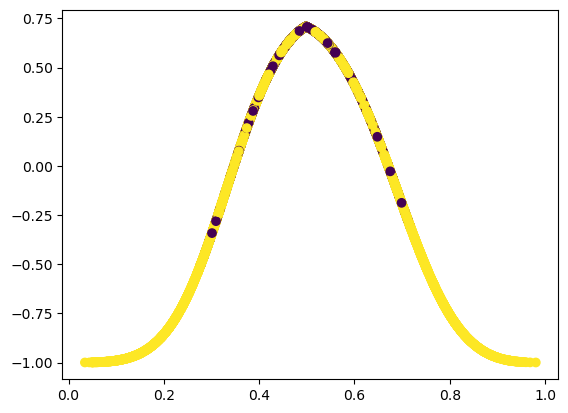

In [287]:
plt.scatter(np.exp(X_test.numpy())/(1+np.exp(X_test.numpy())), rej_scores,  c=corrected_ML)

In [288]:
model.model.state_dict()["fc.weight"]

tensor([[-2.0241],
        [ 4.3099],
        [ 1.3713]], device='cuda:0')

In [289]:
model.model.state_dict()["fc.bias"]

tensor([-0.1293, -0.0800,  2.0142], device='cuda:0')

In [290]:
x_test = X_test.numpy()

In [291]:
instance_check = x_test[0]

In [292]:
import torch.nn.functional as F
model.model.eval()
F.softmax(model.model(torch.tensor(instance_check).float().view(-1, 1).to(device)))[:,2]-F.softmax(model.model(torch.tensor(instance_check).float().view(-1, 1).to(device)))[:,1]

C:\Users\andre\AppData\Local\Temp\ipykernel_7120\2636858408.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([-0.3755], device='cuda:0', grad_fn=<SubBackward0>)

In [293]:
rej_scores[0]
x_test[0]
human_predictions[0] == Y_test.numpy()[0]
preds[0] == Y_test.numpy()[0]

True

In [294]:
tt = rdrobust(correct, test_vals["rej_score"], c=threshold)

In [295]:
tt.bws


,left,right
h,0.263314,0.263314
b,0.377512,0.377512


Call: rdrobust
Number of Observations:                  5000
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations          2481       2519
Number of Unique Obs.           2481       2518
Number of Effective Obs.         481        577
Bandwidth Estimation           0.263      0.263
Bandwidth Bias                 0.378      0.378
rho (h/b)                      0.697      0.697

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional       0.126    0.048    2.604   9.223e-03      [0.031, 0.22]
Robust                 -        -    2.147   3.178e-02     [0.011, 0.241]



In [297]:
res_dict

{'N': [2481, 2519],
 'N_h_l': 481,
 'N_h_r': 577,
 'c': 0.0031310468912124634,
 'p': 1,
 'q': 2,
 'bws_l_h': 0.2633138681220589,
 'bws_l_b': 0.3775122632058113,
 'bws_r_h': 0.2633138681220589,
 'bws_r_b': 0.3775122632058113,
 'tau_cl_l': 0.7840984214167215,
 'tau_cl_r': 0.9097916466305283,
 'tau_bc_l': 0.7775577730785872,
 'tau_bc_r': 0.9035641342288581,
 'coef_conv': 0.12569322521380677,
 'coef_bias': 0.12600636115027086,
 'coef_rob': 0.12600636115027086,
 'se_conv': 0.04827518508791162,
 'se_bias': 0.04827518508791162,
 'se_rob': 0.05868500444789592,
 'bias_l': 0.006540648338134281,
 'bias_r': 0.006227512401670188,
 'pv_conv': 0.009222831465903563,
 'pv_bias': 0.009049766940314724,
 'pv_rob': 0.03178018386832559,
 'ci_conv_l': 0.031075601094494906,
 'ci_conv_u': 0.22031084933311862,
 'ci_bias_l': 0.031388737030959,
 'ci_bias_u': 0.2206239852695827,
 'ci_rob_l': 0.010985865999821973,
 'ci_rob_u': 0.24102685630071974}

(array([ 836.,  444.,  349.,  321.,  298.,  298.,  354.,  406.,  570.,
        1124.]),
 array([0.26751897, 0.30688754, 0.34625612, 0.3856247 , 0.42499328,
        0.46436186, 0.50373044, 0.54309901, 0.58246759, 0.62183617,
        0.66120475]),
 <BarContainer object of 10 artists>)

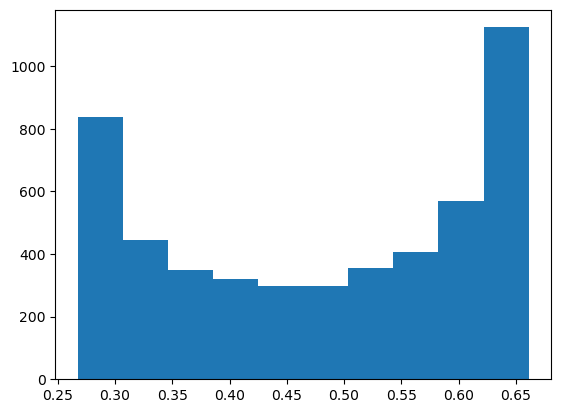

In [298]:
plt.hist(np.exp(test_vals["rej_score"])/(1+np.exp(test_vals["rej_score"]+0.02)))

In [299]:
from rdrobust import rdbwselect

bn = rdbwselect(correct, test_vals["rej_score"], c=threshold, bwselect="msecomb2")

(0.2142857142857143, 14)

(0.15384615384615385, 13)